In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Creamos variables para su posterior uso en la importación de la base
path = "D:\Briam\Clases\Python For Data Science\Data".replace("\\","/")
name = "MarketingDirecto.csv"

In [ ]:
# Importamos la base
df = pd.read_csv(path+"/"+name, sep = ";", header = 0)
df.head()

,Captura,Ciudad,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,REPORTE MKT,NaN,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,REPORTE MKT,NaN,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,REPORTE MKT,NaN,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,REPORTE MKT,NaN,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,REPORTE MKT,NaN,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304


In [ ]:
df_pre = df.copy()

In [ ]:
df_pre.shape

(1010, 12)

### Atributos con demasiados valores nulos

In [ ]:
# ¿Cómo lo detectamos?
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Captura    1010 non-null   object
 1   Ciudad     29 non-null     object
 2   Edad       1010 non-null   object
 3   Genero     1010 non-null   object
 4   Vivienda   1010 non-null   object
 5   Ecivil     1010 non-null   object
 6   Ubicacion  1010 non-null   object
 7   Salario    1010 non-null   int64 
 8   Hijos      1010 non-null   int64 
 9   Historial  704 non-null    object
 10  Catalogos  1010 non-null   int64 
 11  Monto      1010 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 94.8+ KB


In [ ]:
# Solución
df_pre = df_pre.drop(columns = ["Ciudad"])
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Captura    1010 non-null   object
 1   Edad       1010 non-null   object
 2   Genero     1010 non-null   object
 3   Vivienda   1010 non-null   object
 4   Ecivil     1010 non-null   object
 5   Ubicacion  1010 non-null   object
 6   Salario    1010 non-null   int64 
 7   Hijos      1010 non-null   int64 
 8   Historial  704 non-null    object
 9   Catalogos  1010 non-null   int64 
 10  Monto      1010 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 86.9+ KB


### Atributos con solo un valor

In [ ]:
# ¿Cómo lo detectamos?
pd.value_counts(df["Captura"])

Captura
REPORTE MKT    1010
Name: count, dtype: int64

In [ ]:
# Solución
df_pre = df_pre.drop(columns = ["Captura"])
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Edad       1010 non-null   object
 1   Genero     1010 non-null   object
 2   Vivienda   1010 non-null   object
 3   Ecivil     1010 non-null   object
 4   Ubicacion  1010 non-null   object
 5   Salario    1010 non-null   int64 
 6   Hijos      1010 non-null   int64 
 7   Historial  704 non-null    object
 8   Catalogos  1010 non-null   int64 
 9   Monto      1010 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 79.0+ KB


### Datos Erróneos

¿Qué datos erróneos existen?

In [ ]:
# Filtros los campos con valores coherentes para evitar posible información falsa.
df_pre = df_pre[
    (df_pre["Salario"]>=0) &
    (df_pre["Hijos"]>=0) &
    (df_pre["Hijos"]<10) &
    (df_pre["Catalogos"]>=0) &
    (df_pre["Monto"]>=0)
]
df_pre

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304
...,...,...,...,...,...,...,...,...,...,...
1000,Joven,Masculino,Alquilada,Casado,Cerca,53600,1,Medio,24,973
1001,Media,Masculino,Propia,Casado,Cerca,123800,2,NaN,18,3537
1002,Media,Femenino,Propia,Soltero,Cerca,36900,2,Bajo,24,514
1008,Adulta,Masculino,Propia,Soltero,Cerca,63200,0,Alto,24,1507


## Duplicado de Información

In [ ]:
# Información duplicada
print("Registros duplicados:",len(df_pre[df_pre.duplicated() == True]))
df_pre_duplicados = df_pre[df_pre.duplicated() == True]
df_pre_duplicados

Registros duplicados: 5


,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
993,Media,Femenino,Alquilada,Casado,Cerca,75200,1,NaN,24,2702
1000,Joven,Masculino,Alquilada,Casado,Cerca,53600,1,Medio,24,973
1001,Media,Masculino,Propia,Casado,Cerca,123800,2,NaN,18,3537
1002,Media,Femenino,Propia,Soltero,Cerca,36900,2,Bajo,24,514
1008,Adulta,Masculino,Propia,Soltero,Cerca,63200,0,Alto,24,1507


In [ ]:
# Información sin duplicados
print("Registros:",len(df_pre[df_pre.duplicated() == False]))
df_pre = df_pre[df_pre.duplicated() == False]
df_pre

Registros: 1000


,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1304
...,...,...,...,...,...,...,...,...,...,...
996,Media,Masculino,Alquilada,Soltero,Lejos,40500,1,NaN,18,1073
997,Adulta,Masculino,Propia,Soltero,Cerca,44800,0,Medio,24,1417
998,Media,Masculino,Propia,Casado,Cerca,79000,2,Medio,18,671
999,Joven,Masculino,Alquilada,Casado,Cerca,53600,1,Medio,24,973


In [ ]:
# Recodificar los índices
df_pre = df_pre.reset_index(drop = True)
df_pre

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500.0,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600.0,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500.0,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600.0,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400.0,0,Alto,12,1304.0
...,...,...,...,...,...,...,...,...,...,...
995,Media,Masculino,Alquilada,Soltero,Lejos,40500.0,1,NaN,18,1073.0
996,Adulta,Masculino,Propia,Soltero,Cerca,44800.0,0,Medio,24,1417.0
997,Media,Masculino,Propia,Casado,Cerca,79000.0,2,Medio,18,671.0
998,Joven,Masculino,Alquilada,Casado,Cerca,53600.0,1,Medio,24,973.0


Guardamos el dataset limpio

In [ ]:
df_pre.to_csv("MarketingDirecto_limpio.csv", index = False)

### Valores Atípicos

Analizamos de forma gráfica los valores outliers de la variable Salario

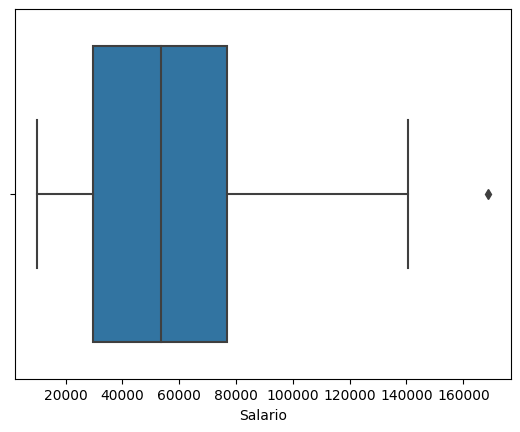

In [ ]:
sns.boxplot(x=df_pre["Salario"])
plt.show()

¿Cómo podemos detectar a qué registro pertenece ese valor  de Salario atípico?

In [ ]:
Q1 = df_pre["Salario"].quantile(0.25)
Q2 = df_pre["Salario"].quantile(0.50)
Q3 = df_pre["Salario"].quantile(0.75)
IQR = Q3 - Q1
LI = Q1-1.5*IQR
LS = Q3+1.5*IQR

Identificamos a los registros que tienen los valores atípicos

In [ ]:
df_pre[
    (df_pre["Salario"]<LI) |
    (df_pre["Salario"]>LS)
]

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
928,Adulta,Masculino,Propia,Casado,Cerca,168800,0,Alto,6,1512


Analizamos de forma gráfica los valores outliers de la variable Salario por Sexo

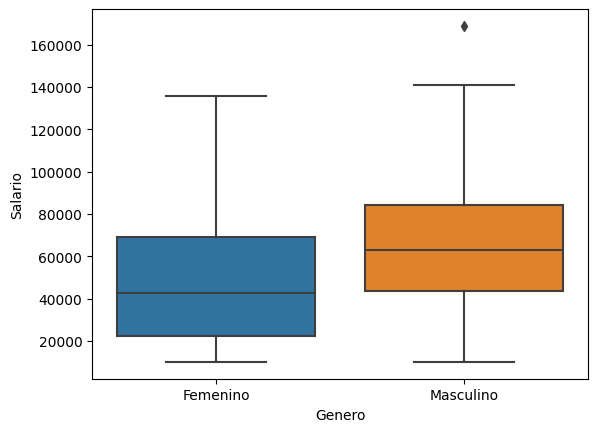

In [ ]:
# Analizamos de forma gráfica los valores outliers de la variable Salario abierto por Género
sns.boxplot(x="Genero",y="Salario", data=df_pre)
plt.show()

In [ ]:
Q1 = df_pre[(df_pre["Genero"] == "Masculino")]["Salario"].quantile(0.25)
Q2 = df_pre[(df_pre["Genero"] == "Masculino")]["Salario"].quantile(0.50)
Q3 = df_pre[(df_pre["Genero"] == "Masculino")]["Salario"].quantile(0.75)
IQR = Q3 - Q1
LI = Q1-1.5*IQR
LS = Q3+1.5*IQR

In [ ]:
df_pre[
    ((df_pre["Genero"] == "Masculino") & (df_pre["Salario"]<LI)) |
    ((df_pre["Genero"] == "Masculino") & (df_pre["Salario"]>LS))
]

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
928,Adulta,Masculino,Propia,Casado,Cerca,168800,0,Alto,6,1512


**Capeo de una variable:** Se aplica cuando no se desea eliminar los valores outliers, reemplazando sus valores originales por un percentil adecuado.

In [ ]:
df_pre["Salario"] = np.where(df_pre["Salario"]>LS, df_pre["Salario"].quantile(0.95), df_pre["Salario"])

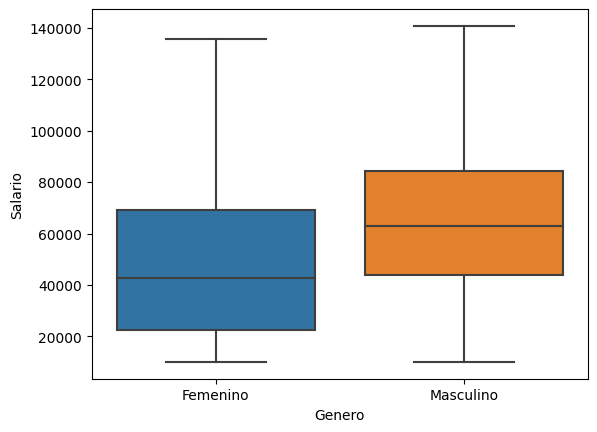

In [ ]:
# Analizamos de forma gráfica los valores outliers de la variable Salario abierto por Género
sns.boxplot(x="Genero",y="Salario", data=df_pre)
plt.show()